In [1]:
import pandas as pd
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


         Unnamed: 0 cap_shape cap_surface cap_color bruises  odor  \
count   2000.000000      2000        2000      2000    2000  2000   
unique          NaN         5           4         9       2     9   
top             NaN    sunken       scaly     brown     yes  foul   
freq            NaN       439         568       263    1023   274   
mean     624.974000       NaN         NaN       NaN     NaN   NaN   
std      375.091938       NaN         NaN       NaN     NaN   NaN   
min        0.000000       NaN         NaN       NaN     NaN   NaN   
25%      290.000000       NaN         NaN       NaN     NaN   NaN   
50%      607.000000       NaN         NaN       NaN     NaN   NaN   
75%      957.250000       NaN         NaN       NaN     NaN   NaN   
max     1279.000000       NaN         NaN       NaN     NaN   NaN   

       gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
count             2000         2000      2000       2000  ...       2000   
unique             

C:\Users\vogul\AppData\Local\Temp\ipykernel_25688\3290434529.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


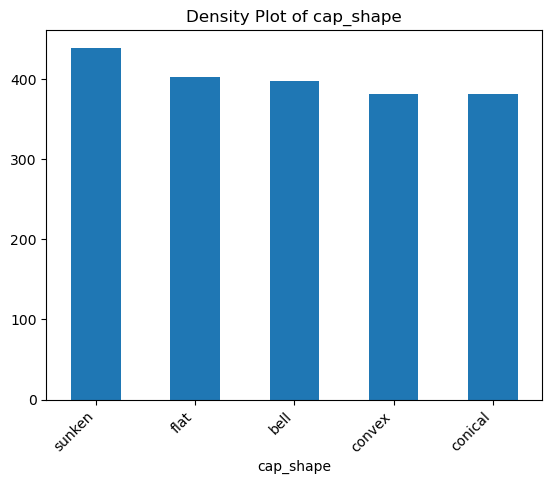

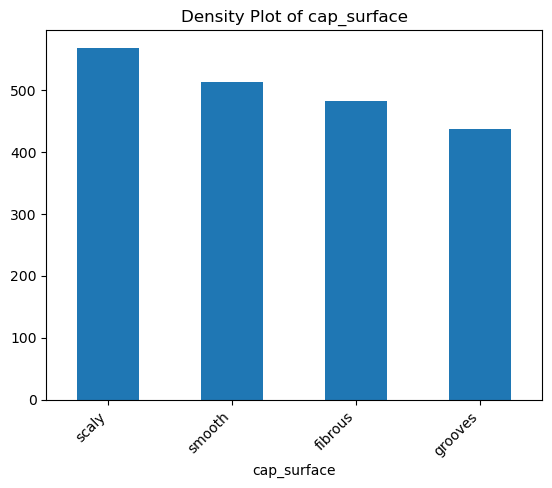

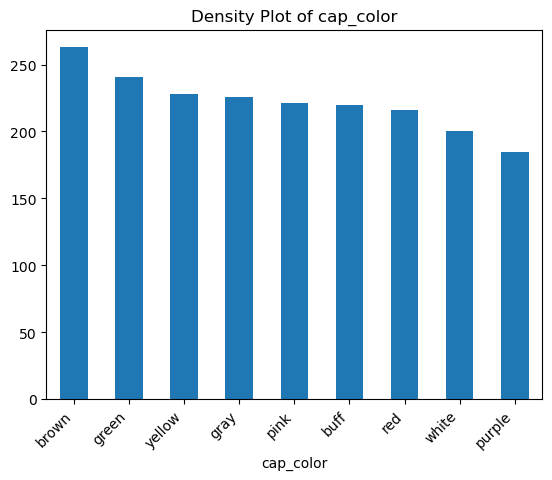

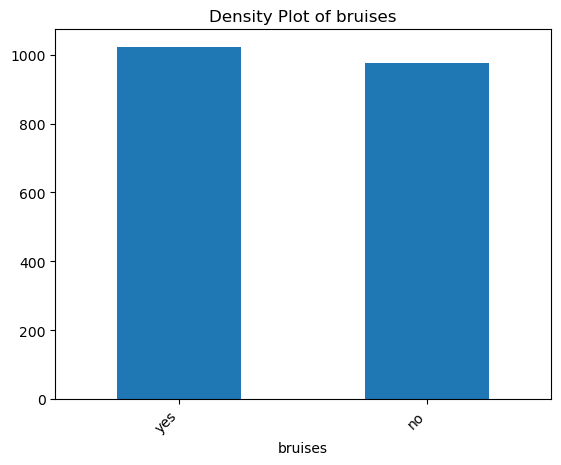

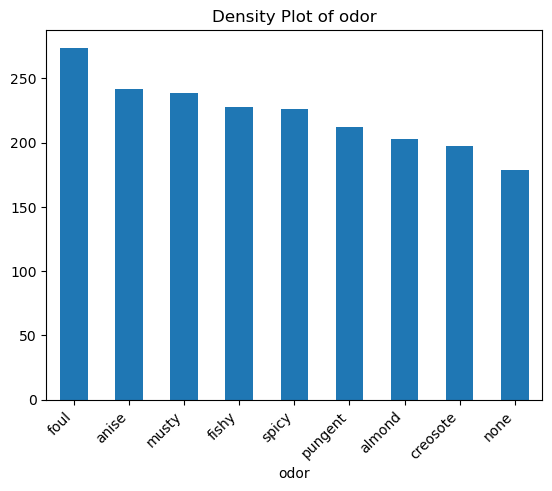

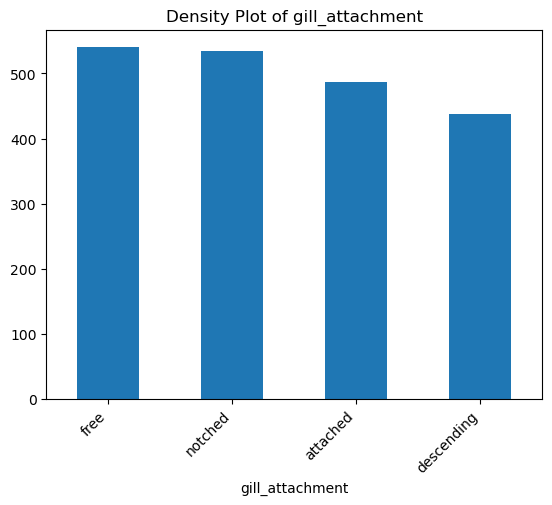

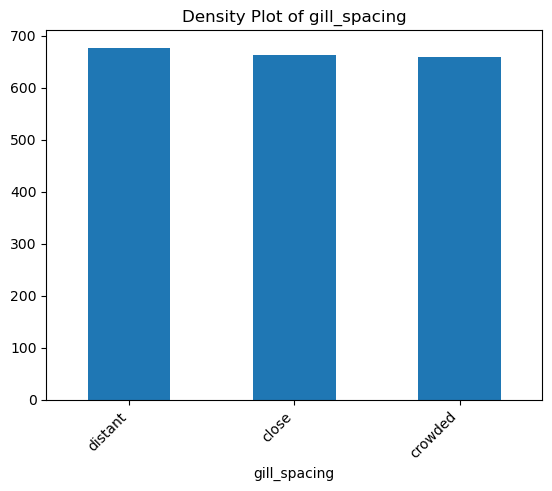

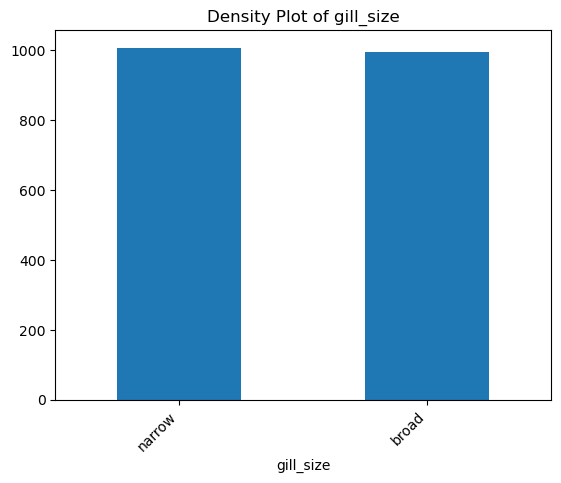

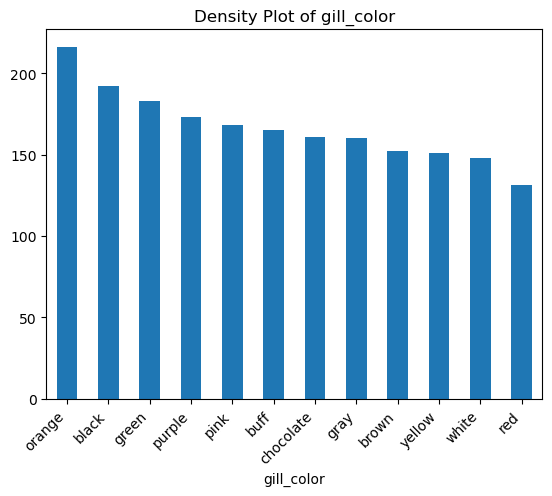

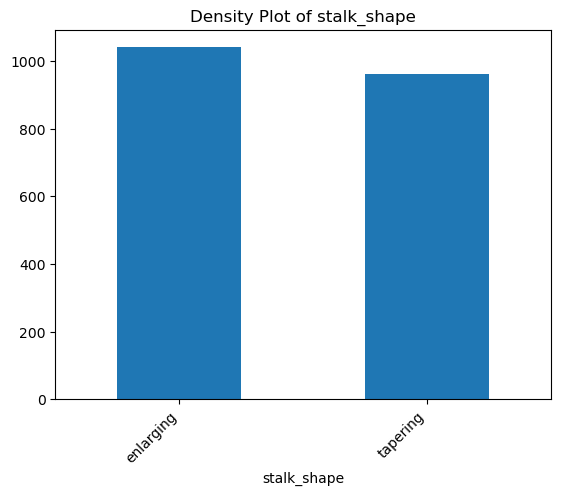

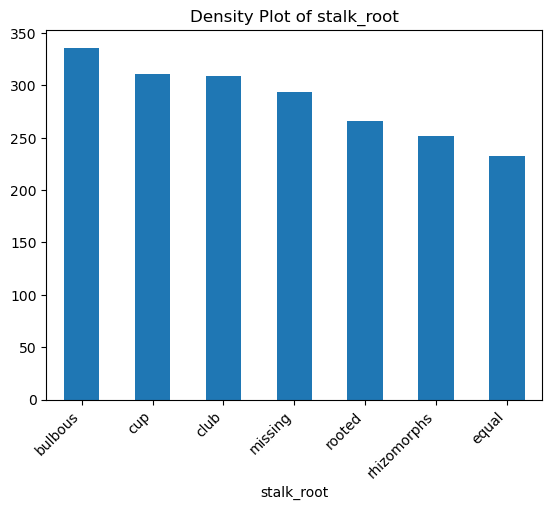

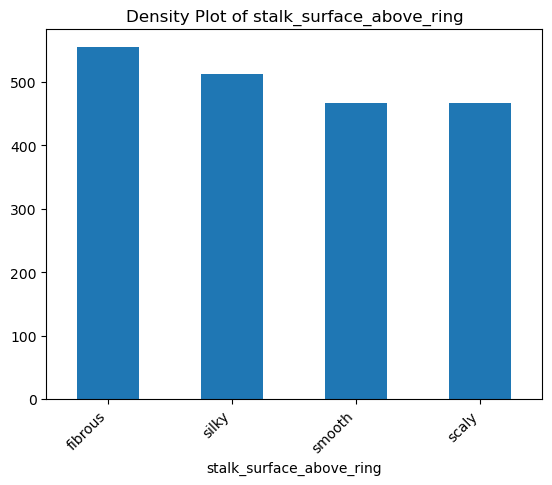

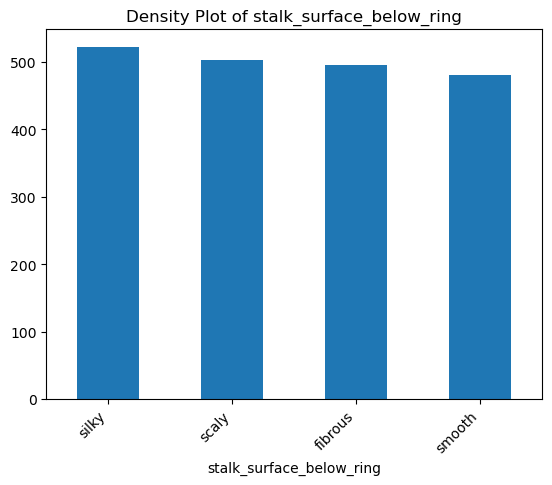

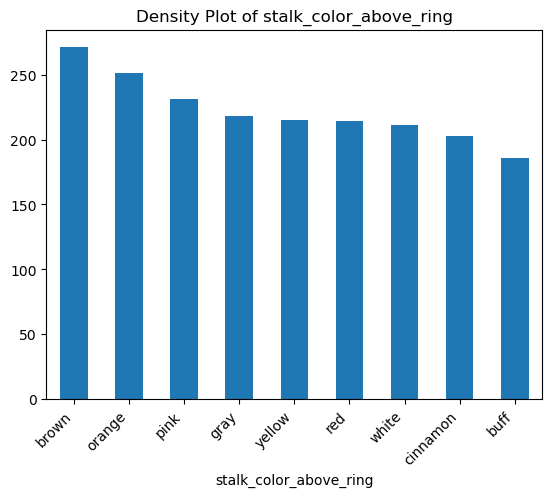

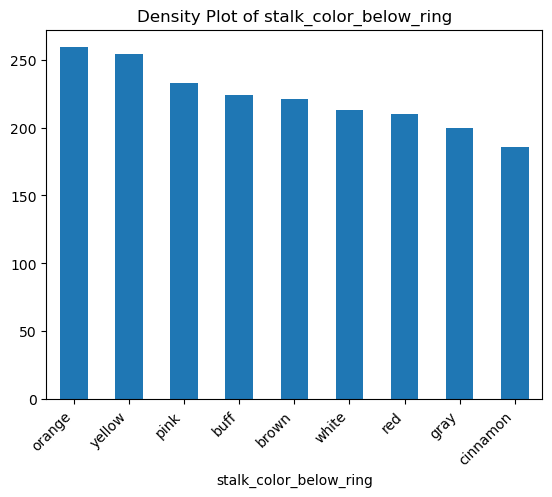

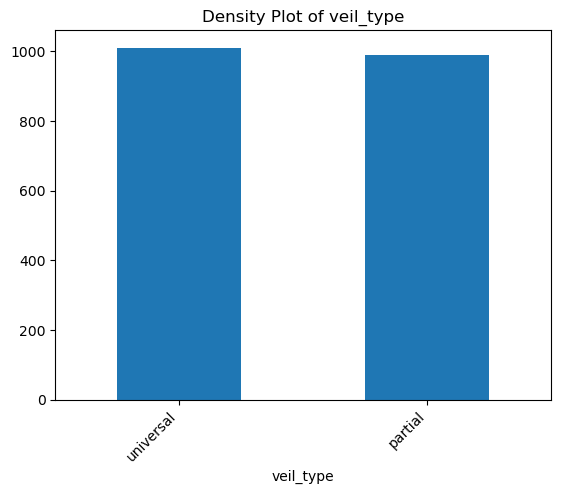

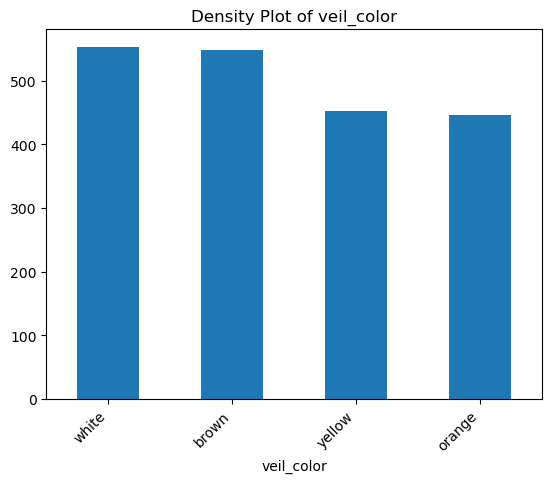

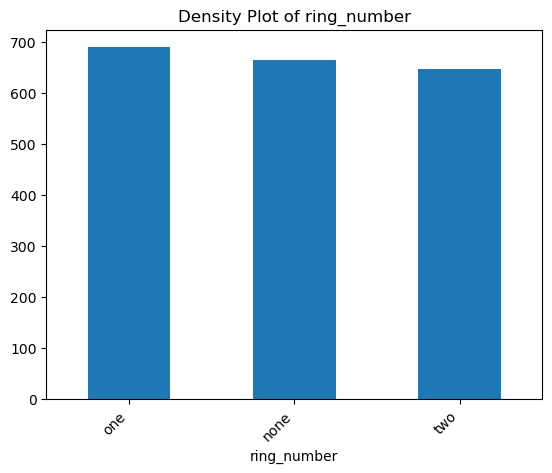

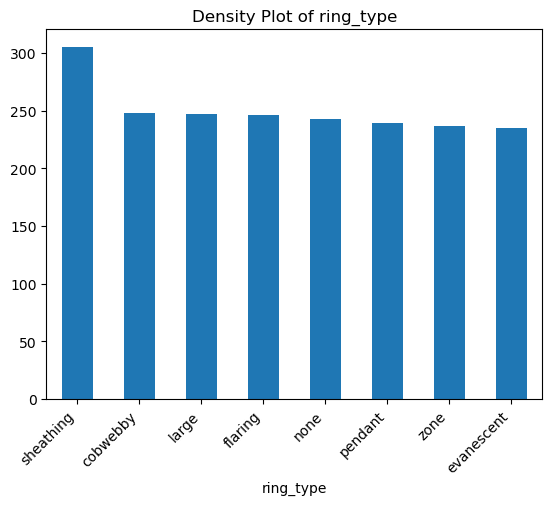

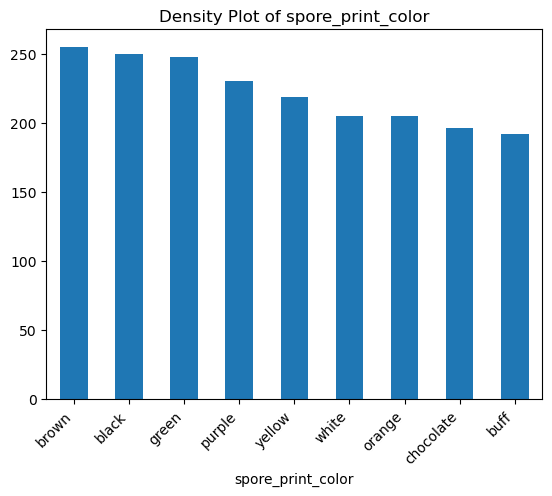

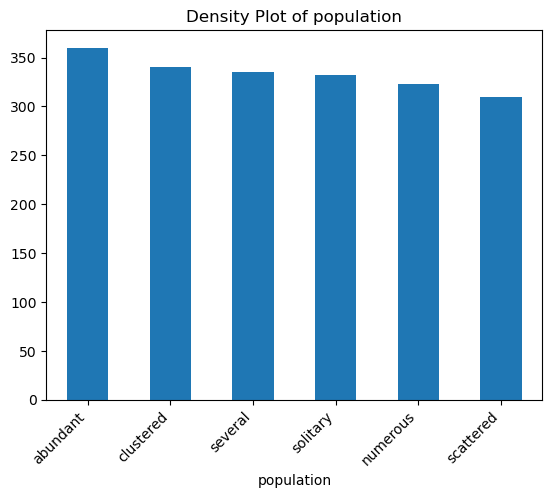

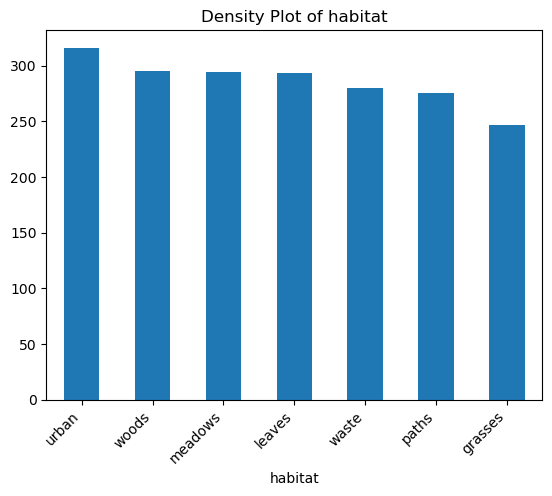

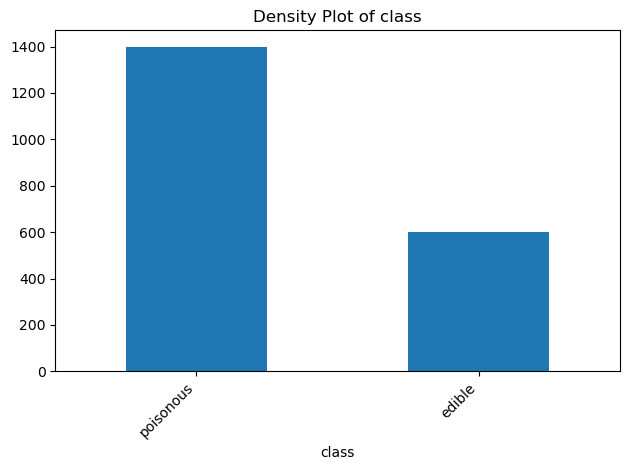

In [28]:
#Task1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("mushroom.csv")

# Display basic statistics
print(df.describe(include='all'))

# Density Plots for categorical features
for col in df.select_dtypes(include=['object']):
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Density Plot of {col}')
    plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()


In [13]:
#  Task 2: Data Preprocessing
# 1.	Encode categorical variables if necessary.
# 2.	Split the dataset into training and testing sets.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features using Label Encoding
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features (X) and target variable (y)
X = df.drop('class', axis=1)  # Assuming 'class' is the target variable
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (1600, 25) (1600,)
Testing data shape: (400, 25) (400,)


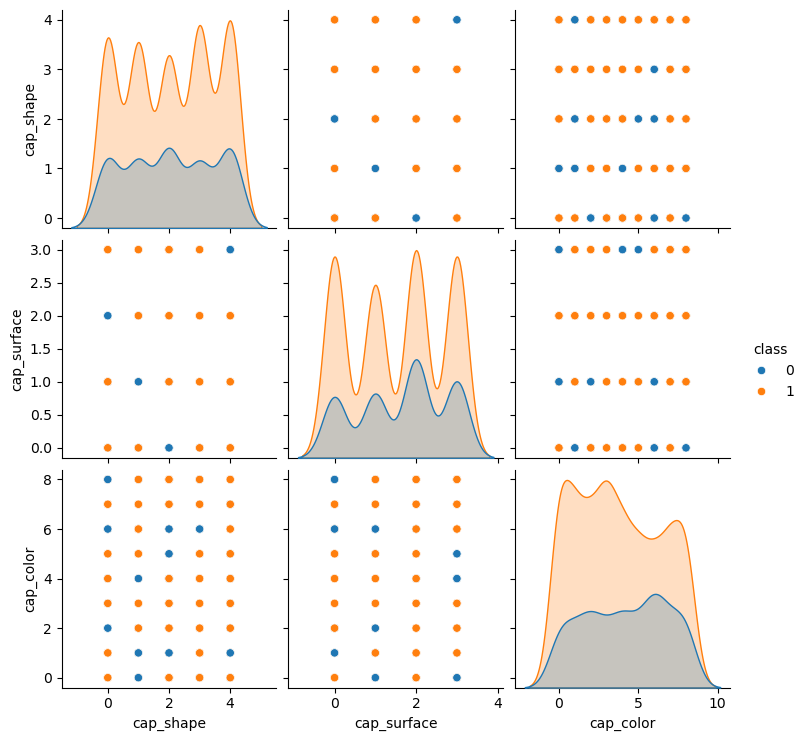

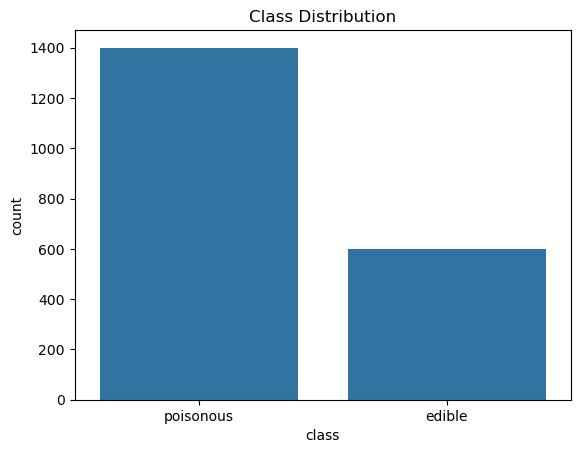

In [32]:
#Task3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Encode selected categorical columns
encoded_df = df[['cap_shape', 'cap_surface', 'cap_color', 'class']].copy()
label_encoders = {}

for col in encoded_df.columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le  # Store encoders if needed later

# Pair plot of encoded features
sns.pairplot(encoded_df, hue='class')
plt.show()

# Class distribution
plt.figure()
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()


In [15]:
# Task 4: SVM Implementation
# 1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
# 2.	Train the SVM model on the training data.
# 3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear')  # You can experiment with different kernels (e.g., 'rbf', 'poly')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))


Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Visualization of decision boundary is only available for 2D data.


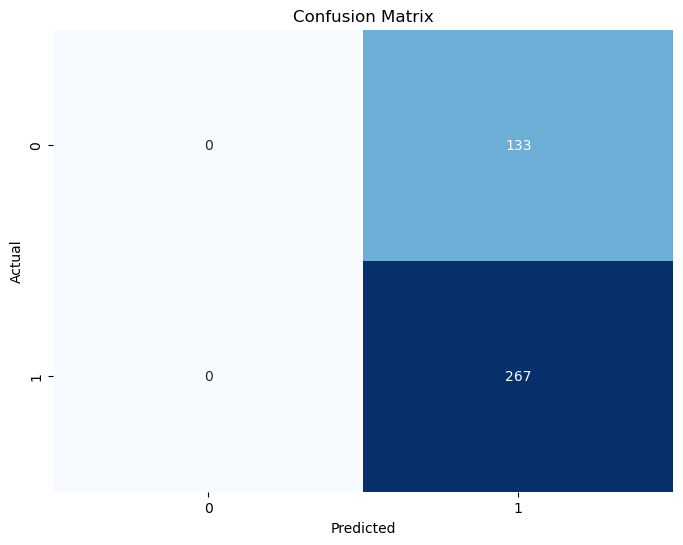

In [17]:
#  Task 5: Visualization of SVM Results
# 1.	Visualize classification results on the testing data.

import numpy as np



# Visualize the decision boundary (for 2D data only)
if X_test.shape[1] == 2:  # Check if there are only two features
    # Create a meshgrid for plotting the decision boundary
    x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
    y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the meshgrid
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()
else:
    print("Visualization of decision boundary is only available for 2D data.")


# Alternatively, create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
# Task 6: Parameter Tuning and Optimization
# 1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.



#Sigmoid Kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print(f"Accuracy (Sigmoid Kernel): {accuracy_sigmoid}")
print(classification_report(y_test, y_pred_sigmoid))





Accuracy (Sigmoid Kernel): 0.5325
              precision    recall  f1-score   support

           0       0.28      0.25      0.26       133
           1       0.64      0.67      0.66       267

    accuracy                           0.53       400
   macro avg       0.46      0.46      0.46       400
weighted avg       0.52      0.53      0.53       400



In [26]:
#  Task 7: Comparison and Analysis
# 1.    Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
# 2.    Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
# 3.    Discuss practical implications of SVM in real-world classification tasks.

# 1. Compare SVM performance with various kernels

# The provided code already performs SVM classification with a linear kernel.
# To compare with other kernels, modify the 'kernel' parameter in the SVC() function and re-run the model evaluation.

# Example:
# Polynomial Kernel

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test


# Create a new LabelEncoder for each column and apply it to X_train and X_test
for col in X_train.select_dtypes(include=['object']).columns:  # Select object (string) type columns
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Use the same encoder for X_test to ensure consistency


svm_poly = SVC(kernel='poly', degree=3) # Degree can be adjusted.
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy (Polynomial Kernel): {accuracy_poly}")
print(classification_report(y_test, y_pred_poly))

# Radial Basis Function (RBF) Kernel
svm_rbf = SVC(kernel='rbf') # You can tune C and gamma for better performance
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy (RBF Kernel): {accuracy_rbf}")
print(classification_report(y_test, y_pred_rbf))




# Based on EDA (Exploratory Data Analysis):
# - The mushroom dataset has categorical features.  SVM handles categorical data well after label encoding, which has been done in the existing code.
# - Observe the class distribution to see if there's a class imbalance.  If there is, you might need to address it.
# - The visualization (pairplot and class distribution plot) provides an understanding of the feature relationships and the class balance.

# Strengths:
# - Effective in high-dimensional spaces: Suitable for the Mushroom dataset's numerous features.
# - Versatile with different kernels: Allows for non-linear decision boundaries, potentially capturing complex relationships among features.
# - Relatively memory efficient: Does not require storing the entire training dataset.

# Weaknesses:
# - Sensitive to parameter tuning (C, gamma, kernel): Careful tuning needed to optimize performance.  The provided code now includes GridSearchCV for this purpose.
# - Performance degrades with noisy data or overlapping classes: If there's significant overlap between classes in feature space, the decision boundary might not be very accurate.
# - Computationally expensive for large datasets: While not a major issue for the mushroom dataset, consider other algorithms for very large datasets.


# 3. Discuss practical implications of SVM in real-world classification tasks

# - Image classification:  Object recognition, image segmentation.
# - Text categorization: Spam filtering, sentiment analysis.
# - Bioinformatics: Protein classification, gene expression analysis.
# - Handwritten digit recognition:  Recognizing handwritten numbers (MNIST dataset).
# - Medical diagnosis: Identifying diseases based on patient data.
# - Customer churn prediction:  Predicting customers who are likely to stop using a service.



Accuracy (Polynomial Kernel): 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (RBF Kernel): 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
